## Import Libraries

In [25]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data_path = r'C:\Users\moham\Documents\GitHub\machine_learning\car_insurance_cold_call_end_to_end\dataset\carInsurance_train.csv'

In [27]:
call_insurance_df = pd.read_csv(data_path)

In [28]:
call_insurance_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


## Exploratory Data Analysis

### 1. Structural Investigation 
**Check for** 
1. predictor and target
2. Missing values
3. Duplicated values
3. Type of variable, Data type and Variable Category
4. Categorical Variable Cardinality 

In [29]:
call_insurance_df.shape

(4000, 19)

In [30]:
call_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

**Info Observersations:**
* There are 19 features in this dataset
* There are some missing values in the features listed below :
1. Job
2. Education
3. Communication
4. Outcome


In [31]:
# Check for missing values in each column
call_insurance_df.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [32]:
# check for missing values in each column as a percentage of whole dataset
(call_insurance_df.isnull().sum() / call_insurance_df.shape[0]) * 100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

**Missing values Observersations:**

1. Job - 5 missing values
2. Education - 47 missing values
3. Communication - 221 missing values
4. Outcome - 757 missing values


In [33]:
# Check for duplicates in the dataframe
call_insurance_df.duplicated().sum()


0

**Dulicates Observations**
* There are no duplicated values

In [34]:
# Check for unique values in each column
call_column_list = call_insurance_df.columns
for column_name in call_column_list:
    print(call_insurance_df[column_name].value_counts())

Id
1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: count, Length: 4000, dtype: int64
Age
31    182
32    177
33    164
34    163
35    157
     ... 
86      2
87      1
84      1
92      1
95      1
Name: count, Length: 70, dtype: int64
Job
management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: count, dtype: int64
Marital
married     2304
single      1213
divorced     483
Name: count, dtype: int64
Education
secondary    1988
tertiary     1282
primary       561
Name: count, dtype: int64
Default
0    3942
1      58
Name: count, dtype: int64
Balance
 0       309
 1        14
 2        13
 3        13
 5        11
        ... 
 2387      1
 2763      1
-59        1
 827       1
-400       1
Name: count, Length: 2178, dtype: int64
HHInsurance
0 

**Feature Observation**
1. ID - Numerical 
2. Age - Numerical(Discrete)
3. Job - Character , Categorical 
4. Martial - Character, Categorical 
5. Education - Character, Categorical 
6. Default - Numerical (Discrete), Categorical 
7. Balance - Numerical (Discrete)
8. HHInsurance - Numerical (Discrete), Categorical 
9. CarLoan - Numerical (Discrete), Categorical
10. Communication - Character, Categorical 
11. LastContactDay - Numerical (Discrete)
12. LastContactMonth - Character , Categorical 
13. NoOfContacts - Numerical(Discrete)
14. DaysPassed - Numerical(Discrete)
15. PrevAttempts - Numerical(Discrete)
16. Outcome - Character , Categorical 
17. CallStart - Numerical (Temporal)
18. CallEnd - Numerical (Temporal)
19. CarInsurance -  Numerical(Discrete), Categorical , Target Label

In [35]:
#check the dataframe basic numerical statistics
call_insurance_df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


**Describe Observation**
1. Balance has negative values - could mean that they owe money or there is entry error.
2. DaysPassed has -1 - which means that there are clients which has not been contacted before.


## Conclusion for Structural Investigation 
1. There are missing values
2. There are no duplicated values
3. Categorical features looks standarised 
4. There are timestamp which needs to be changed to datetime datatype
4. Handle balance and DaysPassed feature

In [36]:
# Change time to datetime datatype
call_insurance_df['CallStart'] = pd.to_datetime(call_insurance_df['CallStart'])
call_insurance_df['CallEnd'] = pd.to_datetime(call_insurance_df['CallEnd'])

C:\Users\moham\AppData\Local\Temp\ipykernel_33564\1842670530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  call_insurance_df['CallStart'] = pd.to_datetime(call_insurance_df['CallStart'])


C:\Users\moham\AppData\Local\Temp\ipykernel_33564\1842670530.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  call_insurance_df['CallEnd'] = pd.to_datetime(call_insurance_df['CallEnd'])


In [37]:
call_insurance_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,2024-06-10 13:45:20,2024-06-10 13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,2024-06-10 14:49:03,2024-06-10 14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,2024-06-10 16:30:24,2024-06-10 16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,2024-06-10 12:06:43,2024-06-10 12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,2024-06-10 14:35:44,2024-06-10 14:38:56,0


In [38]:
#Extract all the hour, minute and second from the CallEnd time column
call_insurance_df['CallEnd_hour'] = call_insurance_df['CallEnd'].dt.hour
call_insurance_df['CallEnd_minute'] = call_insurance_df['CallEnd'].dt.minute
call_insurance_df['CallEnd_second'] = call_insurance_df['CallEnd'].dt.second


In [39]:
#Extract all the hour, minute and second from the CallStart time column
call_insurance_df['CallStart_hour'] = call_insurance_df['CallStart'].dt.hour
call_insurance_df['CallStart_minute'] = call_insurance_df['CallStart'].dt.minute
call_insurance_df['CallStart_second'] = call_insurance_df['CallStart'].dt.second

In [40]:
call_insurance_timesplit_df = call_insurance_df.drop(['CallStart', 'CallEnd'], axis=1).copy()

In [41]:
call_insurance_timesplit_df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,...,DaysPassed,PrevAttempts,Outcome,CarInsurance,CallEnd_hour,CallEnd_minute,CallEnd_second,CallStart_hour,CallStart_minute,CallStart_second
0,1,32,management,single,tertiary,0,1218,1,0,telephone,...,-1,0,NaN,0,13,46,30,13,45,20
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,...,-1,0,NaN,0,14,52,8,14,49,3
2,3,29,management,single,tertiary,0,637,1,0,cellular,...,119,1,failure,1,16,36,4,16,30,24
3,4,25,student,single,primary,0,373,1,0,cellular,...,-1,0,NaN,1,12,20,22,12,6,43
4,5,30,management,married,tertiary,0,2694,0,0,cellular,...,-1,0,NaN,0,14,38,56,14,35,44


## 2. Content Investigation, Quality Checks and Distribution checks

In [42]:
call_insurance_column_list = call_insurance_timesplit_df.columns
call_insurance_column_list

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CarInsurance', 'CallEnd_hour', 'CallEnd_minute',
       'CallEnd_second', 'CallStart_hour', 'CallStart_minute',
       'CallStart_second'],
      dtype='object')

In [43]:
#Get categorical features list 
cat_features_list =[feature for feature in call_insurance_column_list if call_insurance_timesplit_df[feature].dtypes == 'O']
print(cat_features_list)



['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


In [44]:
cat_binary  = ['Default', 'HHInsurance', 'CarLoan', 'LastContactMonth', 'CarInsurance']
cat_features_list = cat_features_list + cat_binary
print(cat_features_list)

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome', 'Default', 'HHInsurance', 'CarLoan', 'LastContactMonth', 'CarInsurance']


In [45]:
#Get all the numerical featues
numerical_features_list =[feature for feature in call_insurance_column_list if call_insurance_timesplit_df[feature].dtypes != 'O']
print(numerical_features_list)



['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance', 'CallEnd_hour', 'CallEnd_minute', 'CallEnd_second', 'CallStart_hour', 'CallStart_minute', 'CallStart_second']


In [46]:
continuous_features = [feature for feature in numerical_features_list if feature not in cat_features_list]
print(continuous_features)

['Id', 'Age', 'Balance', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CallEnd_hour', 'CallEnd_minute', 'CallEnd_second', 'CallStart_hour', 'CallStart_minute', 'CallStart_second']


In [47]:
# # plot histogram and boxplot for all continous features to check the distribution
# for i, continous_features in enumerate(continuous_features):
#     mean = call_insurance_timesplit_df[continous_features].mean()
#     median = call_insurance_timesplit_df[continous_features].median() 
#     Mode = call_insurance_timesplit_df[continous_features].mode()
#     min_val = call_insurance_timesplit_df[continous_features].min()
#     max_val = call_insurance_timesplit_df[continous_features].max()
    
#     print(f'Mean: {mean}, Median: {median}, Mode: {Mode}, Min: {min_val}, Max: {max_val}')
#     print(f'Skewness: {call_insurance_timesplit_df[continous_features].skew()}')
#     print(f'Kurtosis: {call_insurance_timesplit_df[continous_features].kurt()}')
#     print(f'Variance: {call_insurance_timesplit_df[continous_features].var()}')
#     print(f'Standard Deviation: {call_insurance_timesplit_df[continous_features].std()}')
#     print(f'Range: {max_val - min_val}')
#     print(f'Interquartile Range: {call_insurance_timesplit_df[continous_features].quantile(0.75) - call_insurance_timesplit_df[continous_features].quantile(0.25)}')
    
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
#     values_counts = call_insurance_timesplit_df[continous_features].value_counts().sum()
#     fig.suptitle(f'Histogram Plot for {continous_features}')
#     ax1.hist(call_insurance_timesplit_df[continous_features], bins=int(np.round(math.sqrt(values_counts))))
#     ax2.boxplot(call_insurance_timesplit_df[continous_features])
#     plt.show()

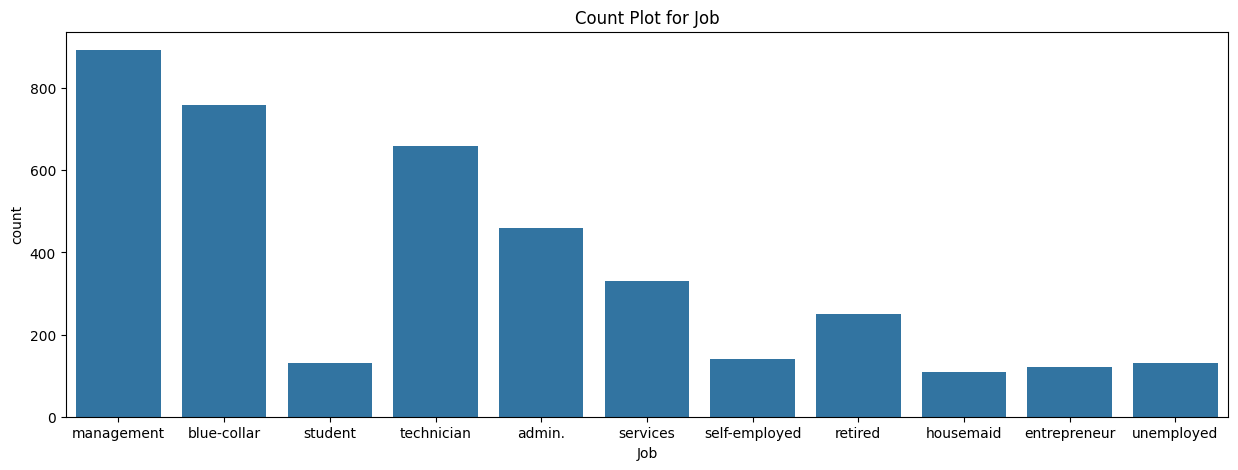

Job
management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
Name: count, dtype: int64
3981


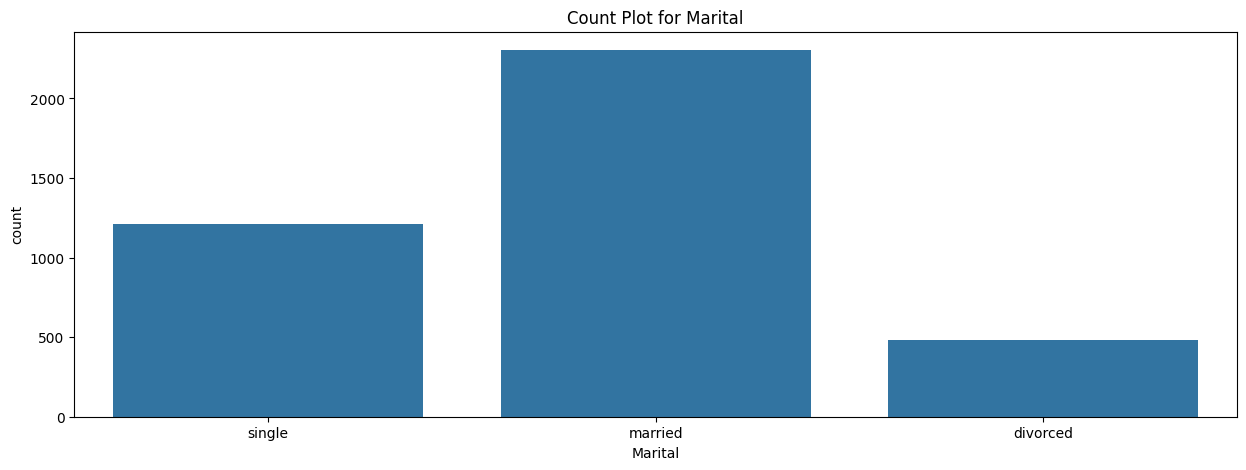

Marital
married     2304
single      1213
divorced     483
Name: count, dtype: int64
4000


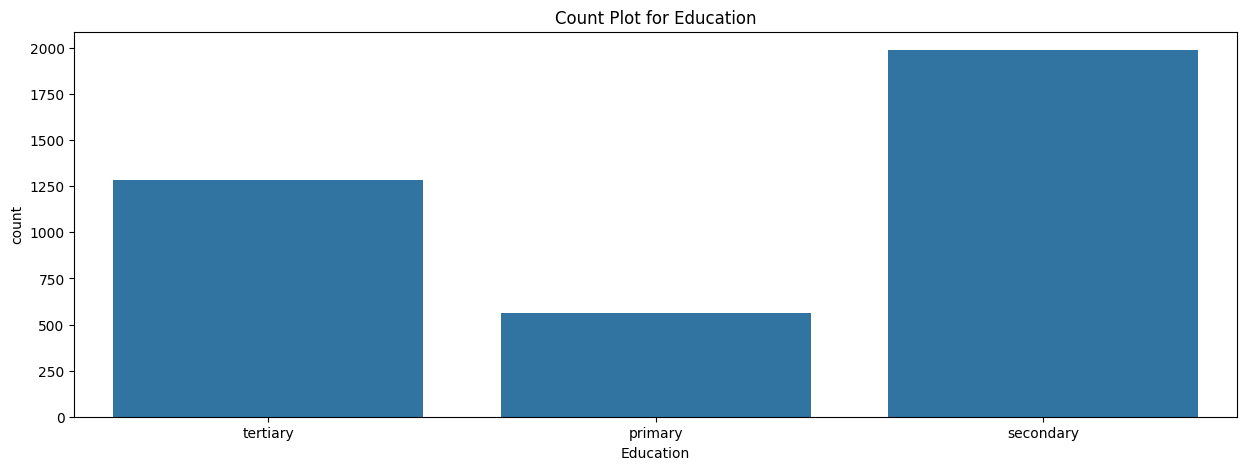

Education
secondary    1988
tertiary     1282
primary       561
Name: count, dtype: int64
3831


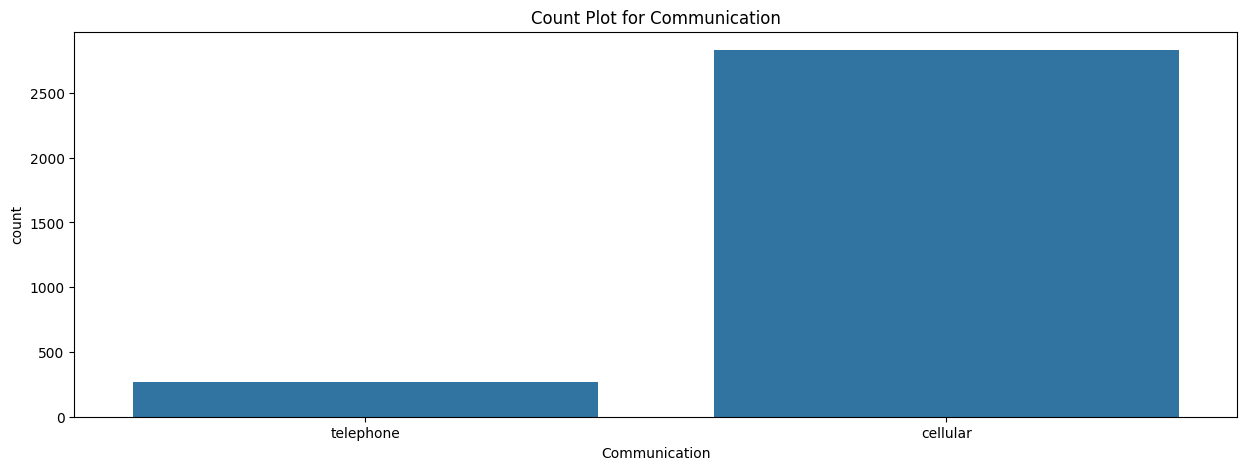

Communication
cellular     2831
telephone     267
Name: count, dtype: int64
3098


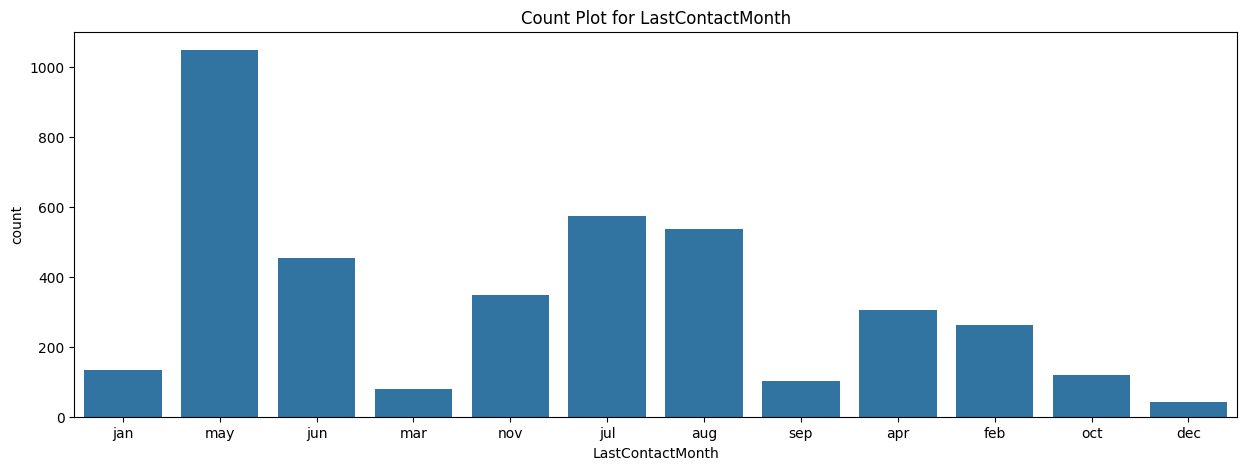

LastContactMonth
may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: count, dtype: int64
4000


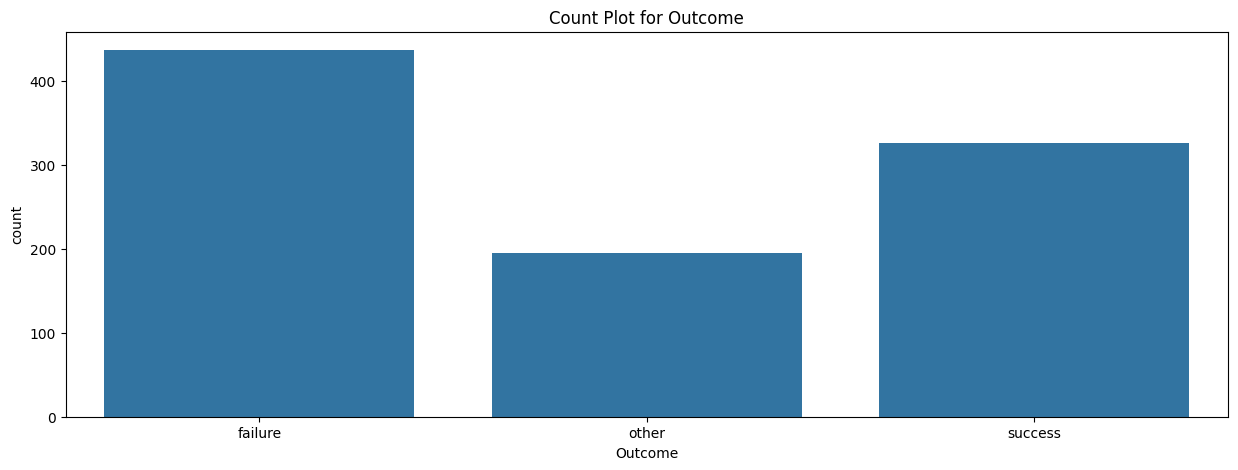

Outcome
failure    437
success    326
other      195
Name: count, dtype: int64
958


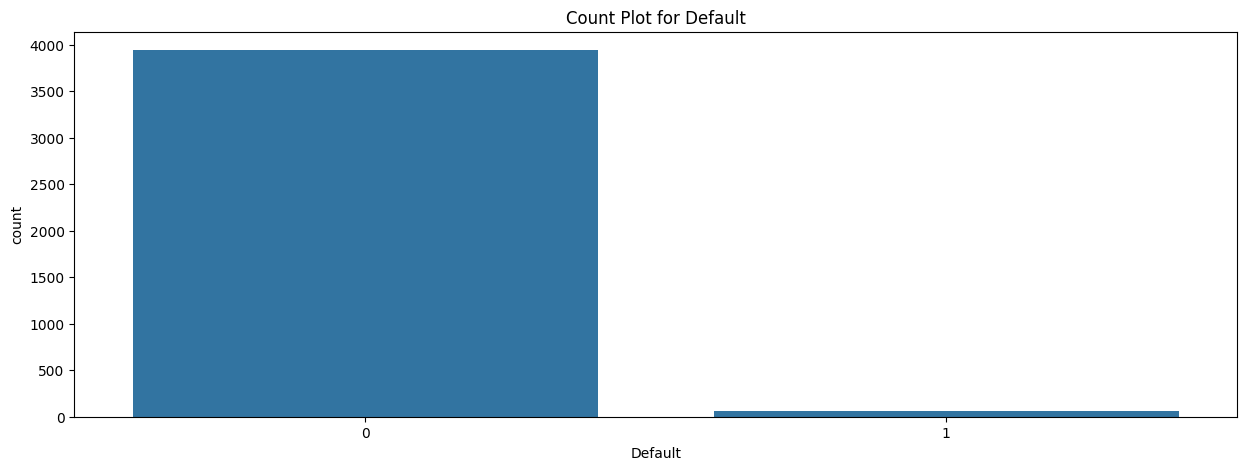

Default
0    3942
1      58
Name: count, dtype: int64
4000


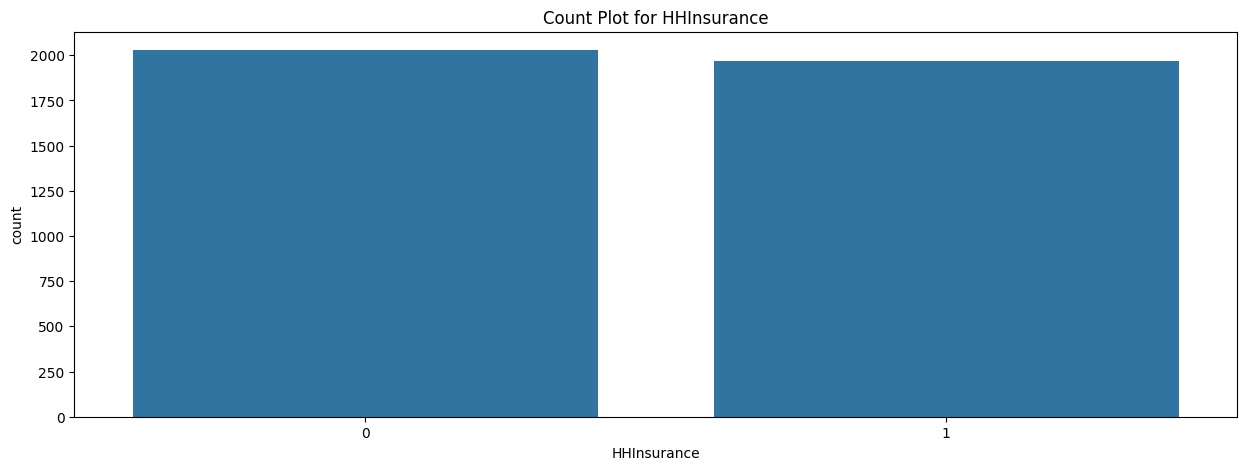

HHInsurance
0    2029
1    1971
Name: count, dtype: int64
4000


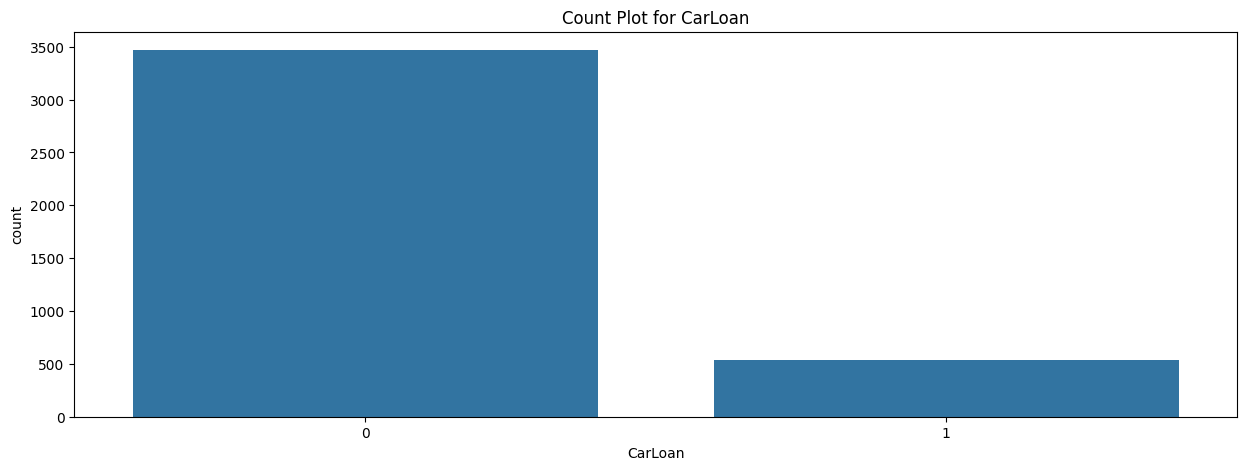

CarLoan
0    3468
1     532
Name: count, dtype: int64
4000


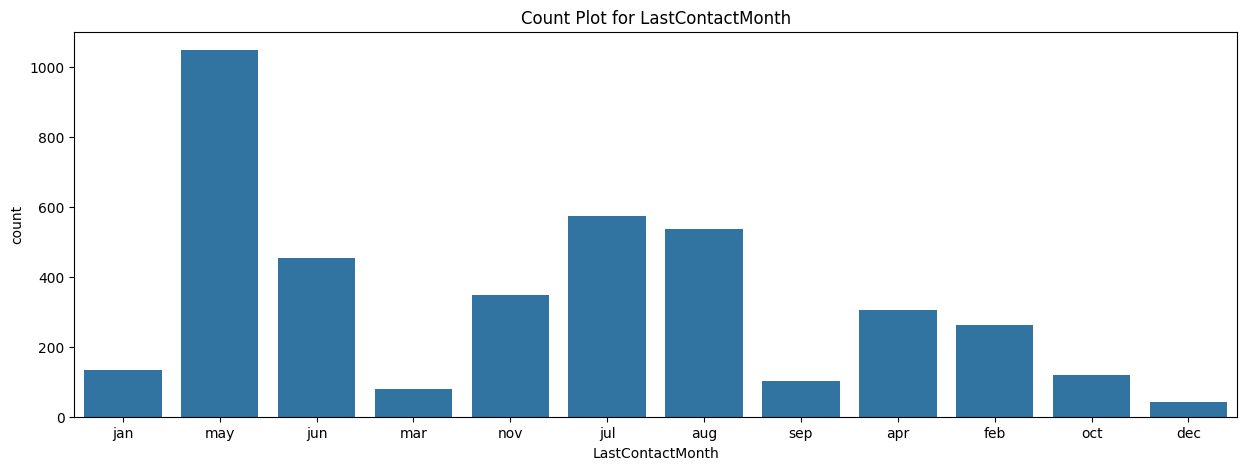

LastContactMonth
may    1049
jul     573
aug     536
jun     454
nov     347
apr     306
feb     262
jan     134
oct     118
sep     101
mar      79
dec      41
Name: count, dtype: int64
4000


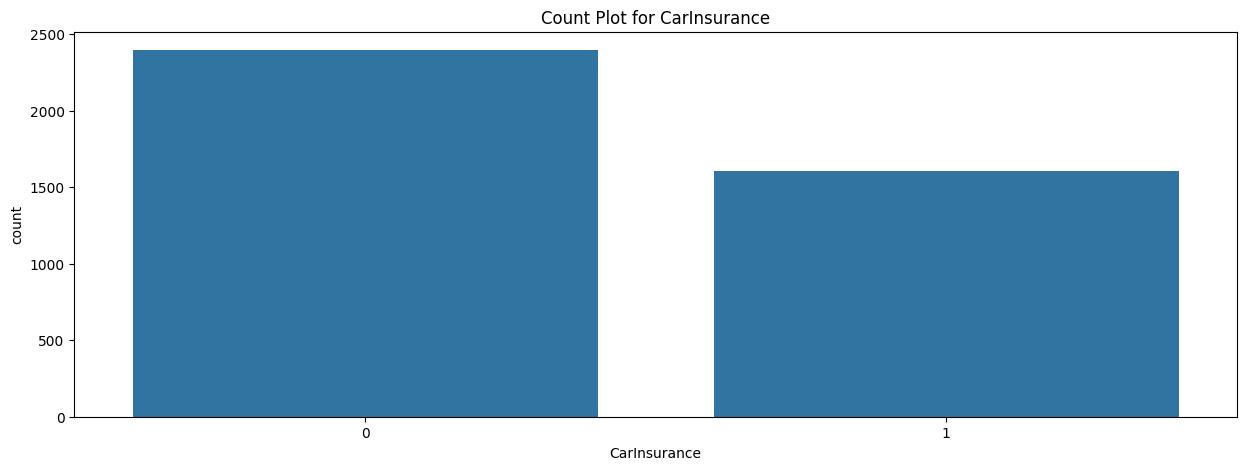

CarInsurance
0    2396
1    1604
Name: count, dtype: int64
4000


In [51]:
# plot countplot for all categorical features
for i, cat_columns in enumerate (cat_features_list):
        plt.figure(figsize=(15, 5))
        sns.countplot(x=cat_columns, data=call_insurance_timesplit_df)
        plt.title(f'Count Plot for {cat_columns}')
        plt.show()
        
        print(call_insurance_timesplit_df[cat_columns].value_counts())
        print(call_insurance_timesplit_df[cat_columns].value_counts().sum())

### Observation 
* Job (Most common jobs are)
1. management 
2. blue-collar
3. technician
4. admin
5. services
6. retired

* Marital  
Most are married and single while some are divorced

* Education  
Most are secondary educated followed bu tertiary

* Communication  
Most use celluar 

* LastContactMonth  
There are few month where most of the last contact month are 
1. may 
2. jun
3. nov
4. jul
5. aug
6. apr
7. feb


* Outcome  
Failure and success rate looks to be quite similar 

* Default  
Most tend not to default on payment 

* HHInsurance  
House insured looks to be both equal

* CarLoan  
Most has no car loan

